In [14]:
#Visualization of instability issues in GAN
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import matplotlib.lines as mlines

from matplotlib import rc
import matplotlib as mpl
from matplotlib.legend_handler import HandlerLine2D

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [2]:
#Code parts: https://stackoverflow.com/questions/40622203/how-to-plot-3d-gaussian-distribution-with-matplotlib
#Grid
x_real, y_real = np.mgrid[-7.0:-2.0:400j, -4.0:4.0:400j]

x1, y1 = np.mgrid[-2.0:2.0:400j, -4.0:4.0:400j]
x2, y2 = np.mgrid[2.0:5.0:300j, -4.0:4.0:300j]
x3, y3 = np.mgrid[5.0:9.0:400j, -4.0:4.0:400j]

# Need an (N, 2) array of (x, y) pairs.
xy_real = np.column_stack([x_real.flat, y_real.flat])

xy1 = np.column_stack([x1.flat, y1.flat])
xy2 = np.column_stack([x2.flat, y2.flat])
xy3 = np.column_stack([x3.flat, y3.flat])

In [3]:
#Model: 3 hills
mu1 = np.array([0.0, 0.0])
sigma1 = np.array([.2, .2])
covariance1 = np.diag(sigma1**2)

mu2 = np.array([3.0, 0.0])
sigma2 = np.array([.17, .17])
covariance2 = np.diag(sigma2**2)

mu3 = np.array([7.0, 0.0])
sigma3 = np.array([.4, .4])
covariance3 = np.diag(sigma3**2)

z1 = multivariate_normal.pdf(xy1, mean=mu1, cov=covariance1)
z2 = multivariate_normal.pdf(xy2, mean=mu2, cov=covariance2)
z3 = multivariate_normal.pdf(xy3, mean=mu3, cov=covariance3)

#Real: 1 Hill
mu_real = np.array([-5.0, 0.0])
sigma_real = np.array([.25, .25])
covariance_real = np.diag(sigma_real**2)

z_real = multivariate_normal.pdf(xy_real, mean=mu_real, cov=covariance_real)

In [4]:
#Second visualization 
#Approximation for distribution
z1_filtered = z1>0.02
z2_filtered = z2>0.02
z3_filtered = z3>0.02

z_real_filtered = z_real>0.02

In [5]:
# Reshape back to a (30, 30) grid.
z1 = z1.reshape(x1.shape)
z2 = z2.reshape(x2.shape)
z3 = z3.reshape(x3.shape)
z_real = z_real.reshape(x_real.shape)

z_real.shape

(400, 400)

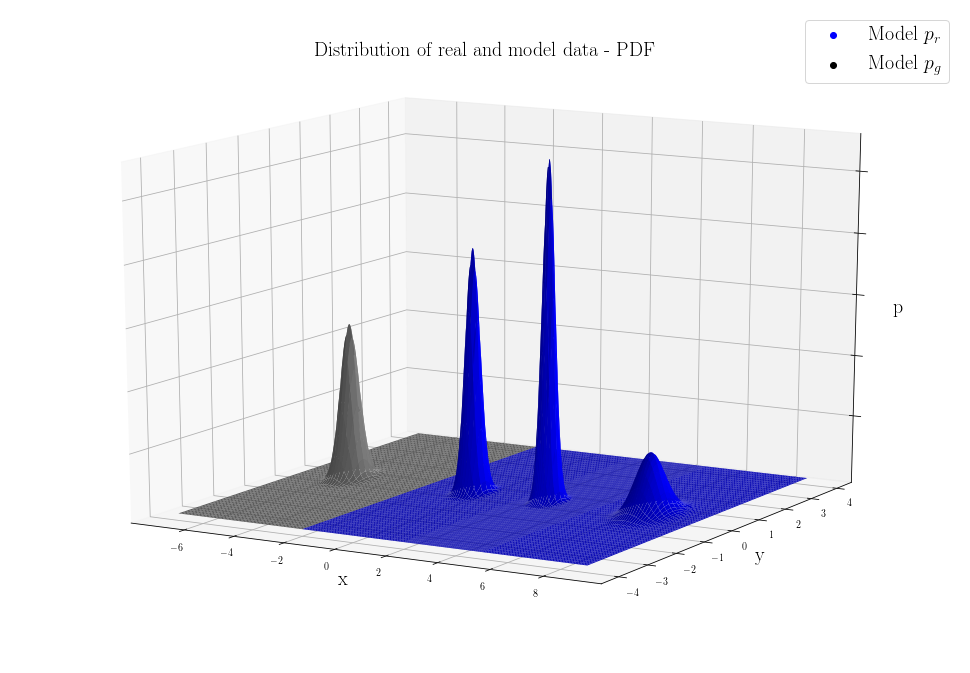

In [41]:
# Plot the cdf
fig = plt.gcf()
fig.set_size_inches(17,12)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ax = fig.add_subplot(111, projection='3d')

#Plots
ax.plot_surface(x1,y1,z1, color='blue')
ax.plot_surface(x2,y2,z2, color='blue')
ax.plot_surface(x3,y3,z3, color='blue')
ax.plot_surface(x_real,y_real,z_real, color='grey')

#plt.grid(True)
plt.title(r"Distribution of real and model data - PDF", fontsize=20, color='black')
ax.set_xlabel(r'x', fontsize=20)
ax.set_ylabel(r'y', fontsize=20)
ax.set_zlabel(r'p', fontsize=20)
ax.set_zticklabels([])
ax.tick_params('x', width=20)
ax.tick_params('y', width=20)

#Legend
fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='blue', marker = 'o')
#ax.legend([fake2Dline], [r'Model $p_r$'], numpoints = 1, fontsize=20)
fake2Dline2 = mpl.lines.Line2D([0],[0], linestyle="none", c='black', marker = 'o')
ax.legend([fake2Dline, fake2Dline2], [r'Model $p_r$', r'Model $p_g$'], numpoints = 1, fontsize=20)

ax.view_init(15, -60)

#Show
plt.show()

In [42]:
#Save
fig.savefig('Visualization_Instability_GAN.eps', format='eps', dpi=1000, bbox_inches = 'tight')

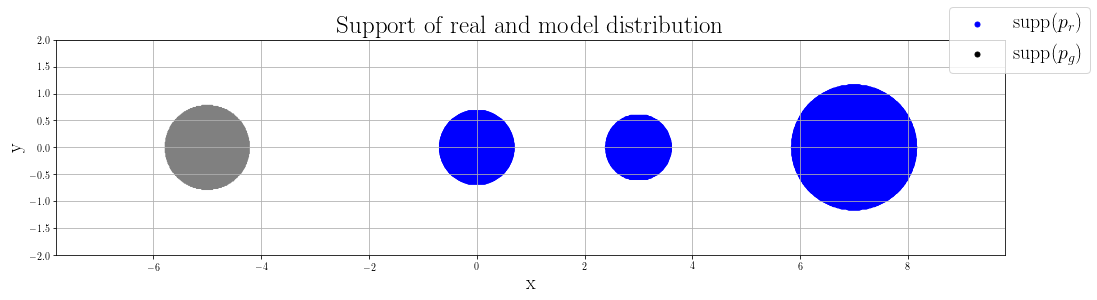

In [43]:
#Plot
fig = plt.gcf()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

fig.set_size_inches(17,7)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.scatter(x1, y1, z1_filtered, color='blue', linewidths = 5)
label_model = mlines.Line2D([], [], color='blue', marker='.', linestyle='None', markersize=10, label=r'$\mathrm{supp}(p_r)$')
plt.scatter(x2, y2, z2_filtered, color='blue', linewidths = 5)
plt.scatter(x3, y3, z3_filtered, color='blue', linewidths = 5)

plt.scatter(x_real, y_real, z_real_filtered, color='grey')
label_real = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label=r'$\mathrm{supp}(p_g)$')
                            
plt.ylabel(r"y", fontsize=20)
plt.xlabel(r'x', fontsize=20)

plt.ylim(-2, 2)
plt.title(r"Support of real and model distribution", fontsize=25, color='black')

#Legend
plt.legend(handles=[label_model, label_real], fontsize=20, loc='upper right', scatterpoints=1, bbox_to_anchor=(1.1, 1.2))
 
#Show
plt.show()

In [46]:
#Save
fig.savefig('Visualization_Instability_GAN_2D.eps', format='eps', dpi=1000, bbox_inches = 'tight')